# General Framework 

add intro

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from financial_functions import *

add general description 

## Simulate risk-free investment

In this section the risk-free investment rate in Mexico (given by cetes bonds) is analyzed.

In [3]:

cetes = getRiskFreeRate()
cetes


{28: 5.51, 91: 5.7, 182: 5.97}

The following code shows the equivallent annual interest rate for each instrument (i.e. the equivalent annual rate with only 1 captitalization per year). 

In [15]:

for days in cetes.keys():
    eq_intrate = equivalentAnnualInterest(cetes[days] / 100, days / 360)
    print('\nCETES {}'.format(days))
    print(' o Rate:              {:.4f}%\n o Annual_equivalent: {:.4f}%'.format(cetes[days], 100*eq_intrate))
    


CETES 91
 o Rate:              5.7000%
 o Annual_equivalent: 5.2745%

CETES 28
 o Rate:              5.5100%
 o Annual_equivalent: 4.2536%

CETES 182
 o Rate:              5.9700%
 o Annual_equivalent: 5.8053%


Now we use the equivalen annual rate to simulate a virtual investment of 1y for each instrument. 

In [22]:

# set initial capital 
initial_capital = 1000
print('\nSet initial capital: $ {} MXN.\n'.format(initial_capital))

# simulate investemnt
for days in cetes.keys():
    eq_intrate = equivalentAnnualInterest(cetes[days] / 100, days / 360)
    print('CETES {:3d}: $ {:.2f} MXN.'.format(days, futureValue(initial_capital, eq_intrate, 1)))
    


Set initial capital: $ 1000 MXN

CETES  91: $ 1052.74 MXN
CETES  28: $ 1042.54 MXN
CETES 182: $ 1058.05 MXN


Visualize the exponential growth of an investment in a given instrument and x-periods. 

Initial Investment: 1000 MXN
Final Value:        1052.6563 MXN


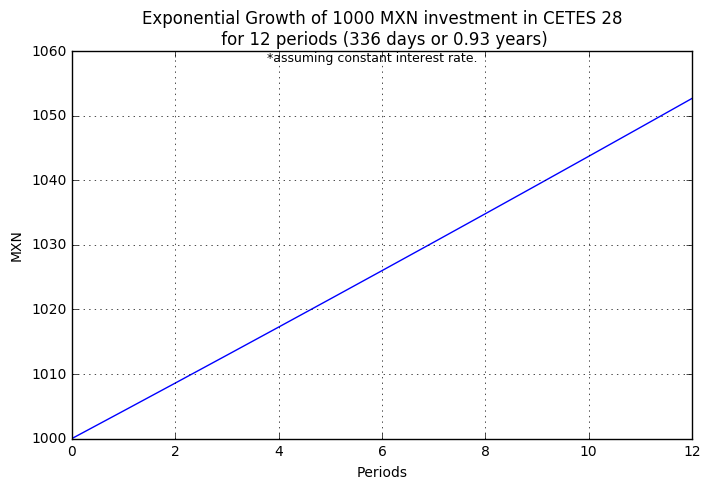

In [26]:
# Exponential growth for investments

periods = 12
growth  = []
initial_capital = 1000
type_cetes      = 28
interest_rate   = type_cetes * cetes[type_cetes] / (360 * 100) 

for period in range(periods + 1):
    growth.append(futureValue(initial_capital, interest_rate, period))


plt.figure(figsize=(8,5))
plt.plot(growth)
plt.grid()
plt.xlabel('Periods')
plt.ylabel('MXN')
plt.suptitle('*assuming constant interest rate.',y=0.9, fontsize=9)
plt.title(('Exponential Growth of {} MXN investment in CETES {}'+
          '\n for {} periods ({} days or {:.2f} years)').format(initial_capital,
                                              type_cetes,
                                              periods,
                                              periods * type_cetes,
                                              periods * type_cetes / 360))

print('Initial Investment: {} MXN\nFinal Value:        {:.4f} MXN'.format(initial_capital, growth[-1]))

Note that due to the low interest rate level, the exponential growth effect is only visible for a range of periods greater than 200. 